<a href="https://colab.research.google.com/github/doo52oh/KaggleStudy/blob/master/Bike_Sharing_Demand/BikeSharingDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand 

## Data Fields¶
  datetime - hourly date + timestamp  
  season - 1 = spring, 2 = summer, 3 = fall, 4 = winter  
  holiday - whether the day is considered a holiday  
  workingday - whether the day is neither a weekend nor holiday  
  weather  

1.   Clear, Few clouds, Partly cloudy, Partly cloudy  
2.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
  
  
  temp - temperature in Celsius  
  atemp - "feels like" temperature in Celsius  
  humidity - relative humidity  
  windspeed - wind speed  
  casual - number of non-registered user rentals initiated  
  registered - number of registered user rentals initiated  
  count - number of total rentals  




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!rm *.*
!kaggle competitions download -c bike-sharing-demand
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 42.1MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 103MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 45.4MB/s]
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
train = pd.read_csv('train.csv', parse_dates = ['datetime'])
test  = pd.read_csv('test.csv' , parse_dates = ['datetime'])

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
print(train.shape)
train.dtypes

(10886, 12)


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
print(test.shape)
test.dtypes

(6493, 9)


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [ ]:
train.isna().sum().sum()

0

In [ ]:
test.isna().sum().sum()

0

#### Preporcessing

In [ ]:
train['year']  = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day']   = train['datetime'].dt.day
train['hour']  = train['datetime'].dt.hour
train['min']   = train['datetime'].dt.minute
train['sec']   = train['datetime'].dt.second
train['dow']   = train['datetime'].dt.dayofweek

In [ ]:
train[['datetime','year','month','day','hour','min','sec','dow']].head()

,datetime,year,month,day,hour,min,sec,dow
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [ ]:
max(train.year), max(train.month), max(train.day), max(train.hour), max(train['min']), max(train.sec)

(2012, 12, 19, 23, 0, 0)

In [ ]:
test['year']  = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day']   = test['datetime'].dt.day
test['hour']  = test['datetime'].dt.hour
test['min']   = test['datetime'].dt.minute
test['sec']   = test['datetime'].dt.second
test['dow']   = test['datetime'].dt.dayofweek

In [ ]:
def day_of_week(day):
  if   day == 0:
    return 'Mon'
  elif day == 1:
    return 'Tue'
  elif day == 2:
    return 'Wed'
  elif day == 3:
    return 'Thur'
  elif day == 4:
    return 'Fri'
  elif day == 5:
    return 'Sat'
  elif day == 6:
    return 'Sun'
  else:
    return 'err'


In [ ]:
train['dow_humanized'] = train['dow'].apply(day_of_week)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec,dow,dow_humanized
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,Sat


In [ ]:
train.dow_humanized.value_counts()

Sat     1584
Sun     1579
Thur    1553
Wed     1551
Mon     1551
Tue     1539
Fri     1529
Name: dow_humanized, dtype: int64

In [ ]:
test['dow_humanized'] = test['dow'].apply(day_of_week)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,min,sec,dow,dow_humanized
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3,Thur
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3,Thur
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3,Thur
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3,Thur
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3,Thur


#### EDA

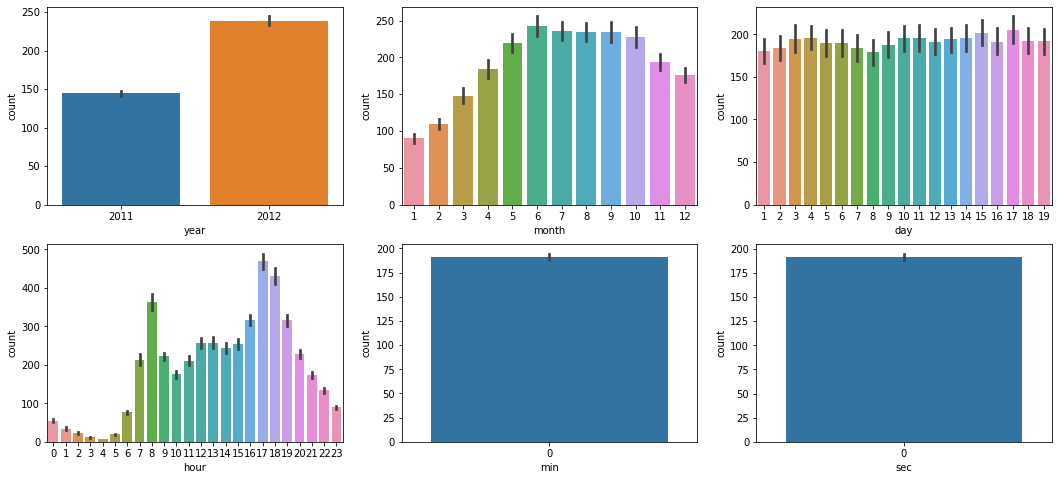

In [ ]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)

figure.set_size_inches(18,8)

sns.barplot(data = train, x = 'year' , y = 'count', ax = ax1)
sns.barplot(data = train, x = 'month', y = 'count', ax = ax2)
sns.barplot(data = train, x = 'day'  , y = 'count', ax = ax3)
sns.barplot(data = train, x = 'hour' , y = 'count', ax = ax4)
sns.barplot(data = train, x = 'min'  , y = 'count', ax = ax5)
sns.barplot(data = train, x = 'sec'  , y = 'count', ax = ax6)

In [ ]:
train['year_str']   = train.year.astype('str')
train['month_str']  = train.month.astype('str')
train['year_month'] = train.year_str + '-' + train.month_str

In [ ]:
train[['year','month','year_month']].head()

,year,month,year_month
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1
3,2011,1,2011-1
4,2011,1,2011-1


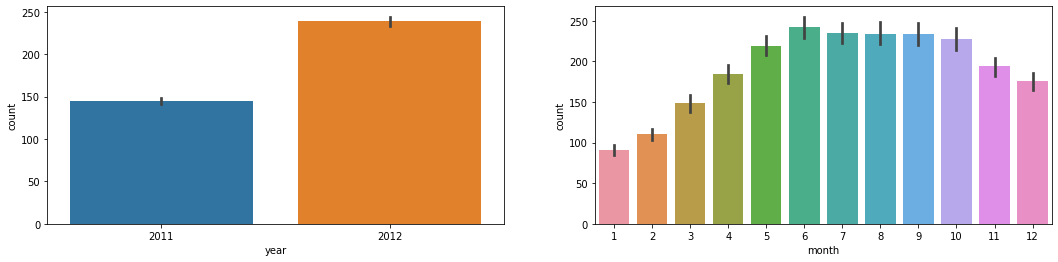

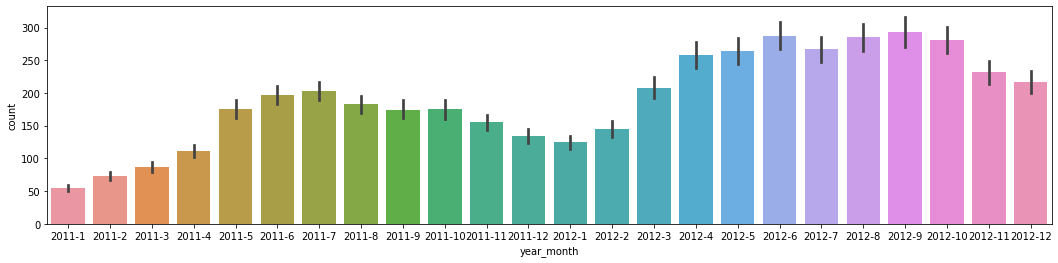

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(18,4)

sns.barplot(data = train, x = 'year'      , y = 'count', ax = ax1)
sns.barplot(data = train, x = 'month'     , y = 'count', ax = ax2)

figure, ax3 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18,4)

sns.barplot(data = train, x = 'year_month', y = 'count', ax = ax3)


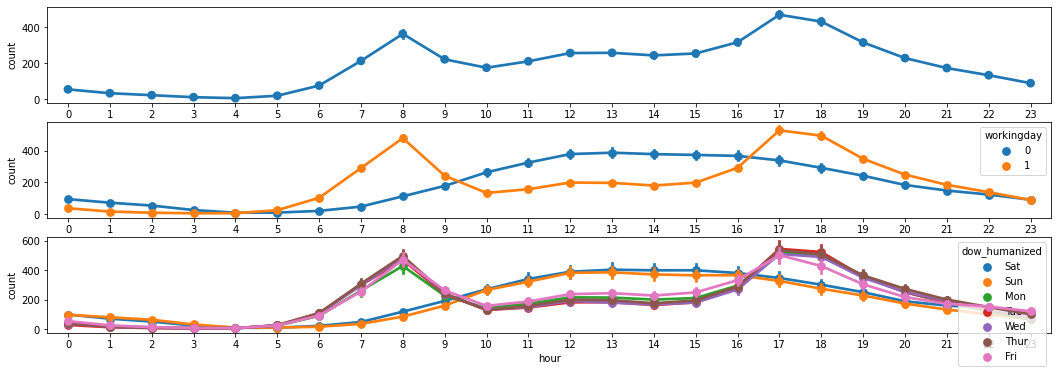

In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1)
figure.set_size_inches(18,6)

sns.pointplot(data = train, x = 'hour', y = 'count'                       , ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday'   , ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dow_humanized', ax = ax3)

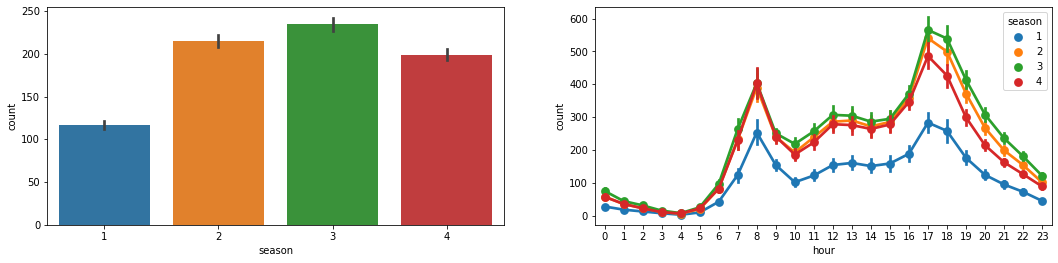

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(18,4)

sns.barplot  (data = train, x = 'season', y = 'count'                , ax = ax1)
sns.pointplot(data = train, x = 'hour'  , y = 'count', hue = 'season', ax = ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


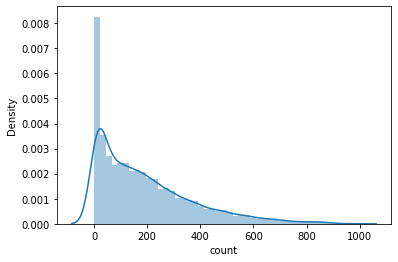

In [ ]:
sns.distplot(train["count"])

In [ ]:
train["log_count"] = np.log(train["count"] + 1)
print(train.shape)

train[["count","log_count"]].head()

(10886, 24)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


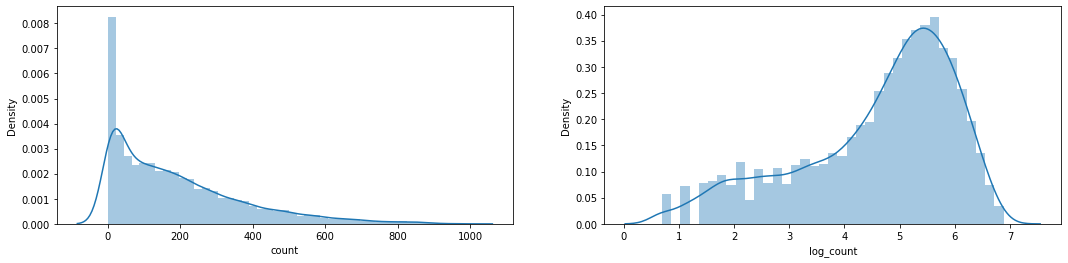

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols =2)

figure.set_size_inches(18,4)

sns.distplot(train["count"], ax=ax1)
sns.distplot(train["log_count"], ax=ax2)

In [ ]:

categorical_feature_names = ["season","holiday","workingday","weather",
                             "dow", "year","month","hour"]

for variable in categorical_feature_names:
    train[variable].astype('category')
    test[variable].astype('category')

In [ ]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 
                 'atemp', 'humidity', 'windspeed', 'year','month', 'hour', 'dow']

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'hour',
 'dow']

In [ ]:
y = "log_count"
y

'log_count'

In [ ]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dow
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5


In [ ]:
X_test = test[feature_names]
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dow
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [ ]:

y_train = train[y]
print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

In [ ]:
from sklearn.metrics import make_scorer

def rmse(predict, actual):
    
    predict = np.array(predict)
    actual = np.array(actual)
    
    distance = predict - actual
    
    square_distance = distance**2
    
    mean_square_distance = square_distance.mean()
    
    score = np.square(mean_square_distance)
    
    return score

rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

In [ ]:
from sklearn.model_selection import cross_val_score

n_estimators = 300

n_epoch = 100

coarse_hyperparameters_list =[]

for epoch in range(n_epoch):
    max_depth=np.random.randint(low=2, high=100)
    max_features=np.random.uniform(low=0.1, high=1.0)
    
    model = RandomForestRegressor(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 n_jobs =-1,
                                 random_state=37)
    score = cross_val_score(model, X_train, y_train, cv=20, scoring = rmse_score).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }
    
    coarse_hyperparameters_list.append(hyperparameters)
    
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

    
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)

coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 19, max_features = 0.765345, Score = 0.01794
 1 n_estimators = 300, max_depth = 13, max_features = 0.166679, Score = 0.10052
 2 n_estimators = 300, max_depth = 15, max_features = 0.987691, Score = 0.01809
 3 n_estimators = 300, max_depth = 39, max_features = 0.218155, Score = 0.08119
 4 n_estimators = 300, max_depth = 28, max_features = 0.883227, Score = 0.01791
 5 n_estimators = 300, max_depth = 57, max_features = 0.928616, Score = 0.01778
 6 n_estimators = 300, max_depth = 90, max_features = 0.452211, Score = 0.02455
 7 n_estimators = 300, max_depth = 69, max_features = 0.179620, Score = 0.08119
 8 n_estimators = 300, max_depth = 78, max_features = 0.951813, Score = 0.01778
 9 n_estimators = 300, max_depth = 19, max_features = 0.907309, Score = 0.01783
10 n_estimators = 300, max_depth = 78, max_features = 0.457233, Score = 0.02455
11 n_estimators = 300, max_depth = 67, max_features = 0.450765, Score = 0.02455
12 n_estimators = 300, max_depth = 43, m

,epoch,score,n_estimators,max_depth,max_features
99,99,0.017713,300,35,0.759931
44,44,0.017715,300,66,0.776084
92,92,0.017715,300,82,0.793812
47,47,0.017715,300,86,0.809071
59,59,0.017715,300,71,0.752013
65,65,0.017715,300,50,0.804194
77,77,0.017715,300,37,0.795487
34,34,0.017778,300,91,0.979464
61,61,0.017778,300,87,0.921677
70,70,0.017778,300,57,0.991388


In [ ]:
best_hyperparameter = coarse_hyperparameters_list.iloc[0]

best_max_depth = best_hyperparameter["max_depth"]

best_max_features = best_hyperparameter["max_features"]

print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

max_depth(best) = 35.0, max_features(best) = 0.759931


In [ ]:
best_n_estimators = 3000

model = RandomForestRegressor(n_estimators=best_n_estimators,
                              max_depth=best_max_depth,
                              max_features=best_max_features,
                              random_state=37,
                              n_jobs=-1)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=35.0, max_features=0.7599308357720773,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=-1, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [ ]:
model.fit(X_train, y_train)

In [67]:
log_predictions = model.predict(X_test)

print(log_predictions.shape)

log_predictions

(6493,)


array([2.4420285 , 1.78705896, 1.42330388, ..., 4.92328846, 4.69707043,
       4.10799606])

In [68]:
predictions = np.exp(log_predictions) - 1


print(predictions.shape)

predictions

(6493,)


array([ 10.49633738,   4.9718631 ,   3.1508116 , ..., 136.45388252,
       108.62554544,  59.8247063 ])